T-Test -> Tells you that by comparing the means of two groups and letting you know the probability of those results happening by chance.

# 1 Sample Test
Tells Us whether means of sampe and population mean are different.

In [22]:
import numpy as np
ages=[10,20,35,50,28,40,10,290,90,20,30,40,50,6089,33,44,55,66,77,88,11,23,45,67,89]
pop_mean=np.mean(ages)
print(pop_mean)

296.0


In [5]:
# Get sample
sample_size=10
age_sample=np.random.choice(ages,10)
print(age_sample)

[55 90 50 66 20 67 20 28 77 77]


In [7]:
from scipy.stats import ttest_1samp
ttest,pvalue=ttest_1samp(age_sample,pop_mean)
print(pvalue)

2.2169381180794248e-10


In [11]:
if pvalue < 0.05: # Alpha value is 0.05 ( 95% Confidence Interval)
    print("Reject Null Hypothesis. Means There is difference between sample mean and population mean")
else:
    print("Accept Null Hypothesis")

Reject Null Hypothesis. Means There is difference between sample mean and population mean


# Example #2

In [12]:
import numpy as np
import scipy.stats as stats
import math

In [13]:
school_ages=stats.poisson.rvs(loc=10,mu=35,size=1500) # Generate 1500 values having mean=35 ,starting value = 10 and follows poission distribution
classA_ages=stats.poisson.rvs(loc=10,mu=30,size=60)

In [14]:
classA_ages.mean()

40.13333333333333

In [15]:
_,p_value=ttest_1samp(classA_ages,school_ages.mean())
print(p_value)

1.751193157392477e-09


In [16]:
if p_value < 0.05:
    print("Reject Null Hypothesis")
    print("There is difference between sample mean and population mean")
else:
    print("Accept Null Hypothesis")
    print("There is no difference between sample mean and population mean")

Reject Null Hypothesis
There is difference between sample mean and population mean


# 2-Sample Test
2 Groups -> 2 Populations

In [17]:
classB_ages=stats.poisson.rvs(loc=18,mu=33,size=60)
_,p_value=stats.ttest_ind(classA_ages,classB_ages,equal_var=False)

In [18]:
if p_value < 0.05:
    print("Reject Null Hypothesis")
    print("There is difference between two groups means..")
else:
    print("Accept Null Hypothesis")
    print("There is no difference between two groups means..")

Reject Null Hypothesis
There is difference between sample mean and population mean


# Paired T-Test
When you want to check how different samples are from the same group .

In [20]:
weight1=[25,30,28,35,28,34,26,29,30,26,28,32,31,30,45] # kids weight @2019 
weight2=weight1+stats.norm.rvs(scale=5,loc=-1.25,size=15) # Kids weight @2020

In [22]:
import pandas as pd
weight_diff=pd.DataFrame({"weights_10":np.array(weight1),
                         "weights_20":np.array(weight2),
                         "weight_change":np.array(weight2)-np.array(weight1)})

In [24]:
weight_diff

,weights_10,weights_20,weight_change
0,25,26.399048,1.399048
1,30,25.868460,-4.131540
2,28,29.738848,1.738848
3,35,33.312872,-1.687128
4,28,30.238558,2.238558
5,34,29.484551,-4.515449
6,26,20.254244,-5.745756
7,29,21.808218,-7.191782
8,30,38.360639,8.360639
9,26,16.701281,-9.298719


In [26]:
_,p_value=stats.ttest_rel(weight1,weight2)
print(p_value)

0.46816601278926373


In [28]:
if p_value < 0.05:
    print("Reject Null Hypothesis")
    print("There is difference between two groups means..")
else:
    print("Accept Null Hypothesis")
    print("There is no difference between two groups means..")

Accept Null Hypothesis
There is no difference between two groups means..


# Correlation

In [14]:
import seaborn as sns
import pandas as pd

In [16]:
df=pd.read_csv('Datasets/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [18]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


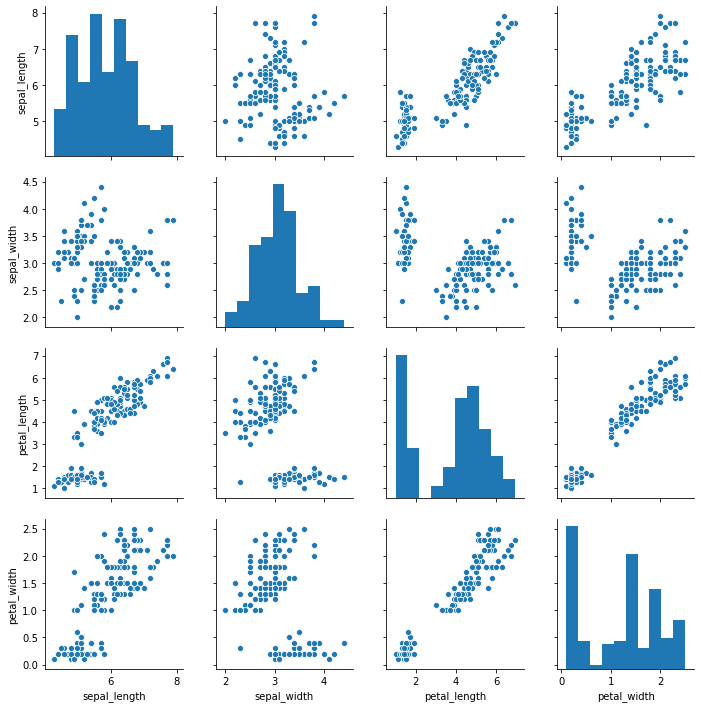

In [21]:
sns.pairplot(df)